C:\Users\eamo8\AppData\Local\Temp\ipykernel_52028\1729191486.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subset_stats.index, y=subset_stats['std'], palette='magma')
C:\Users\eamo8\AppData\Local\Temp\ipykernel_52028\1729191486.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


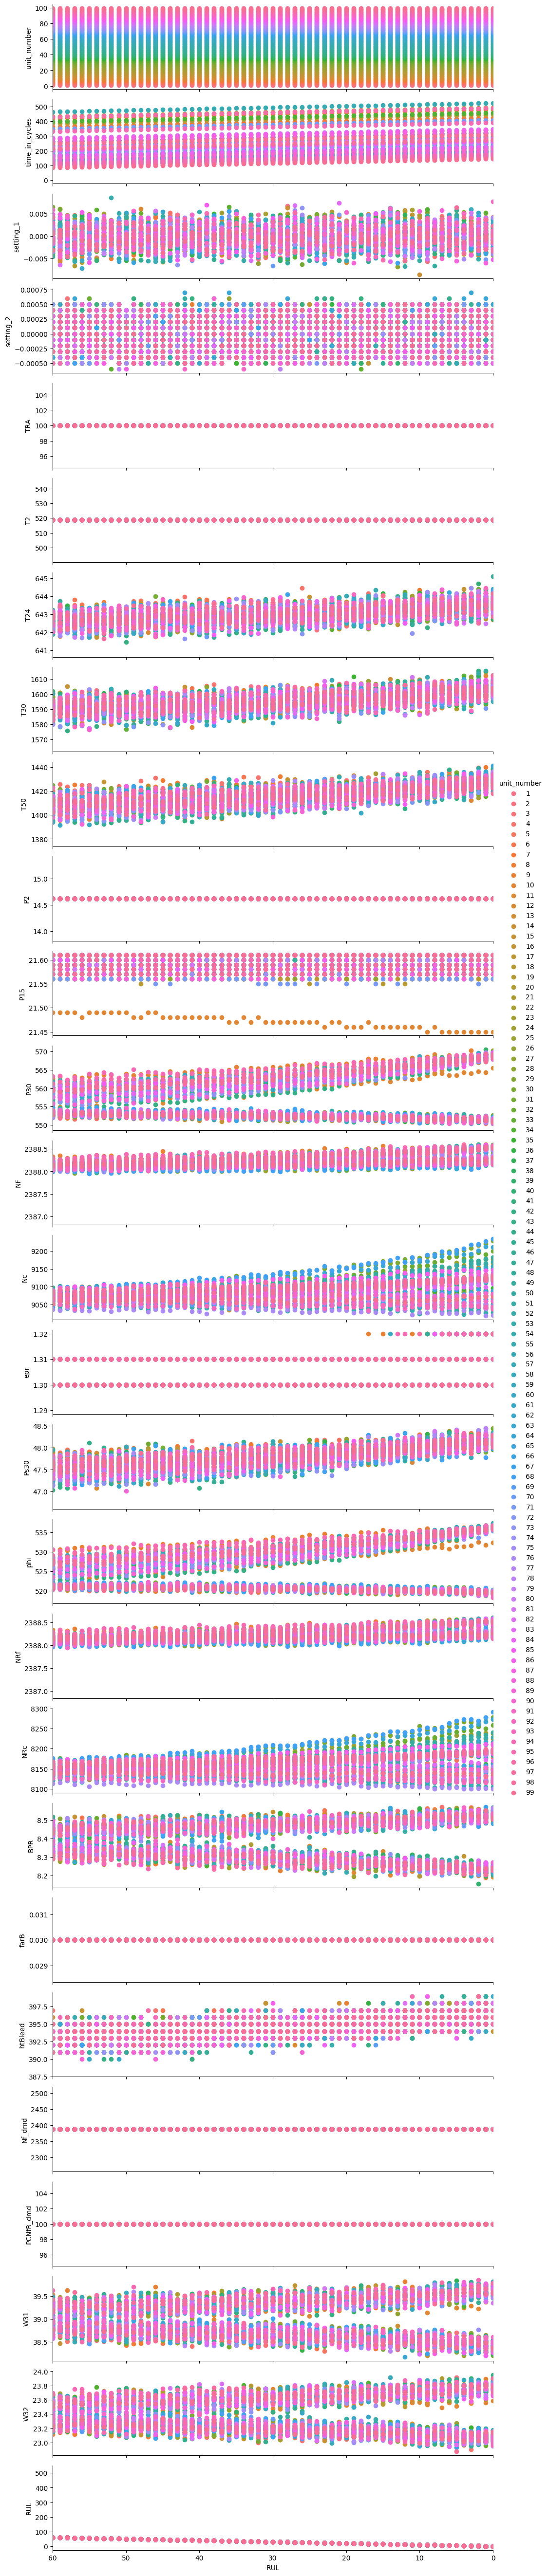

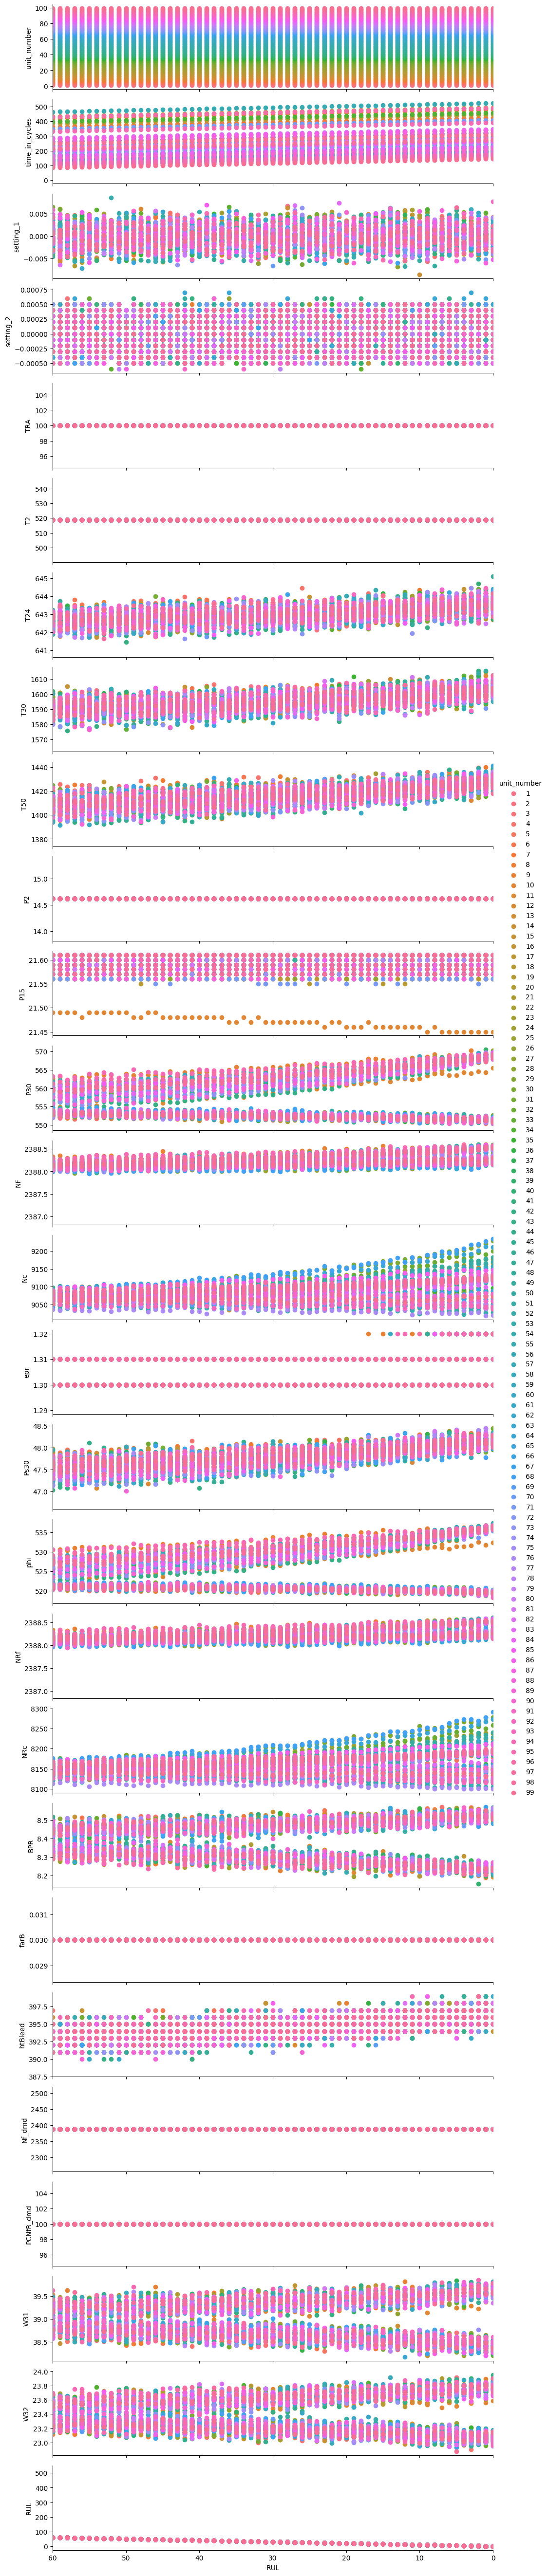

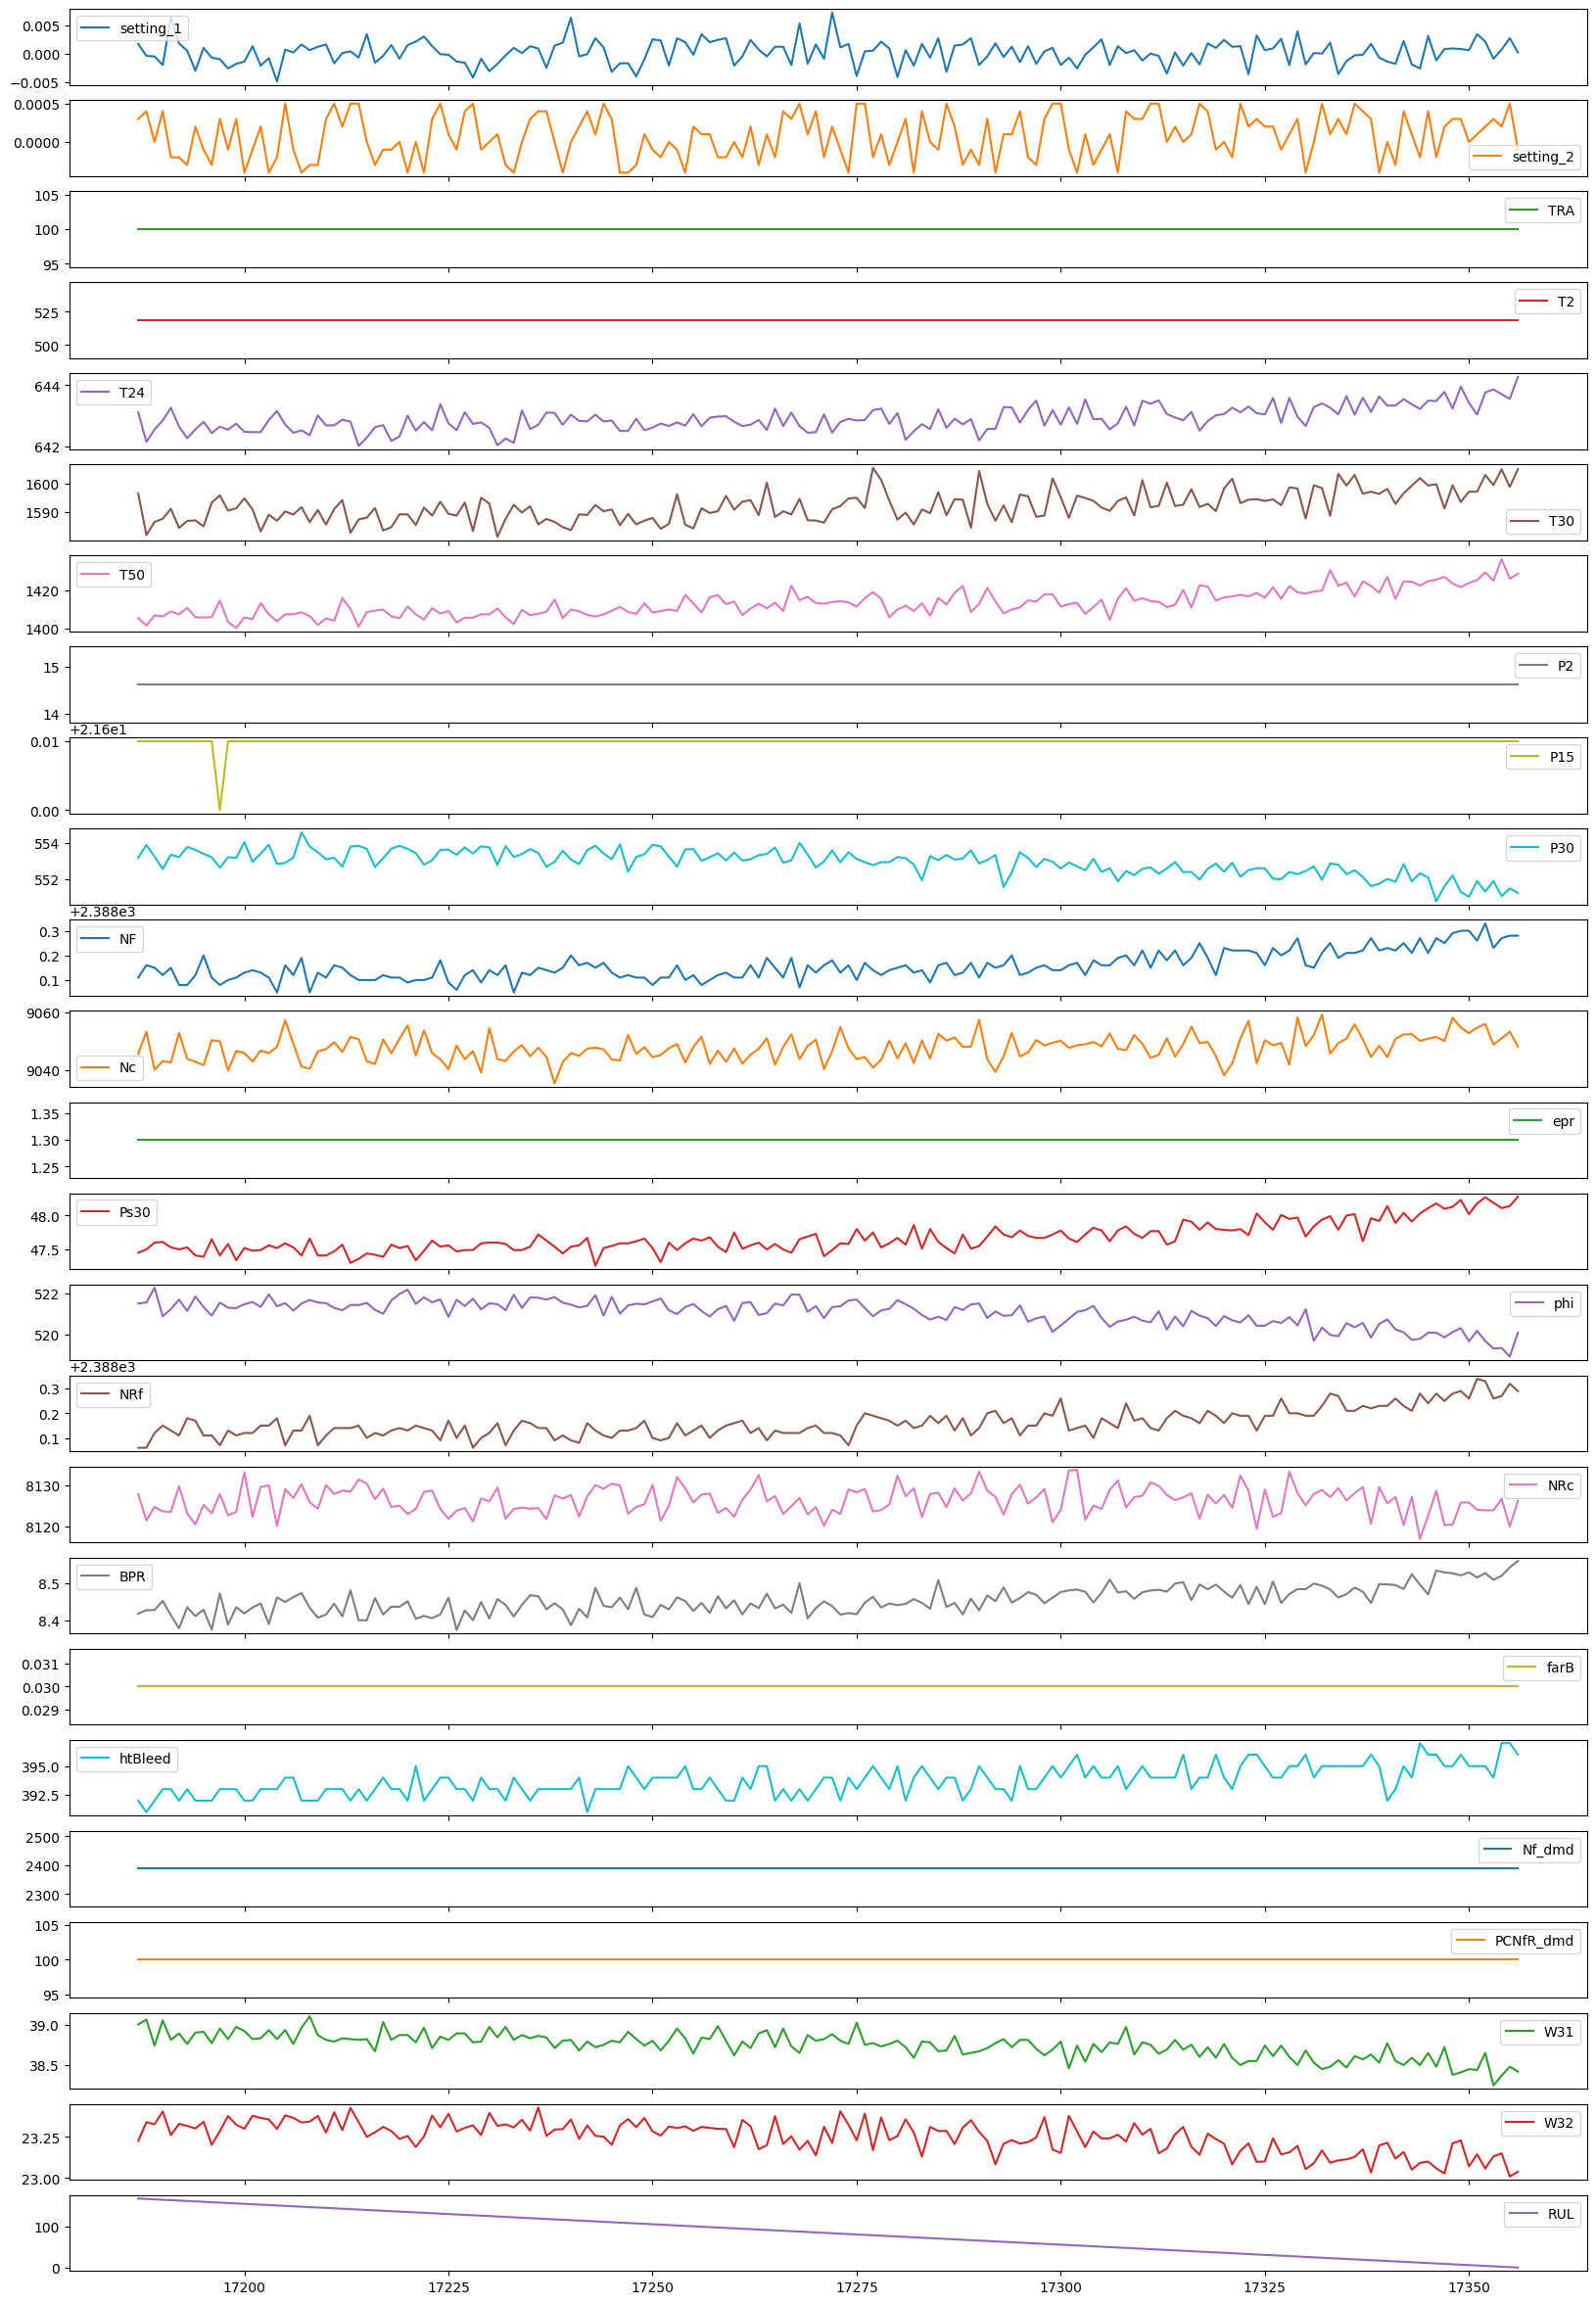

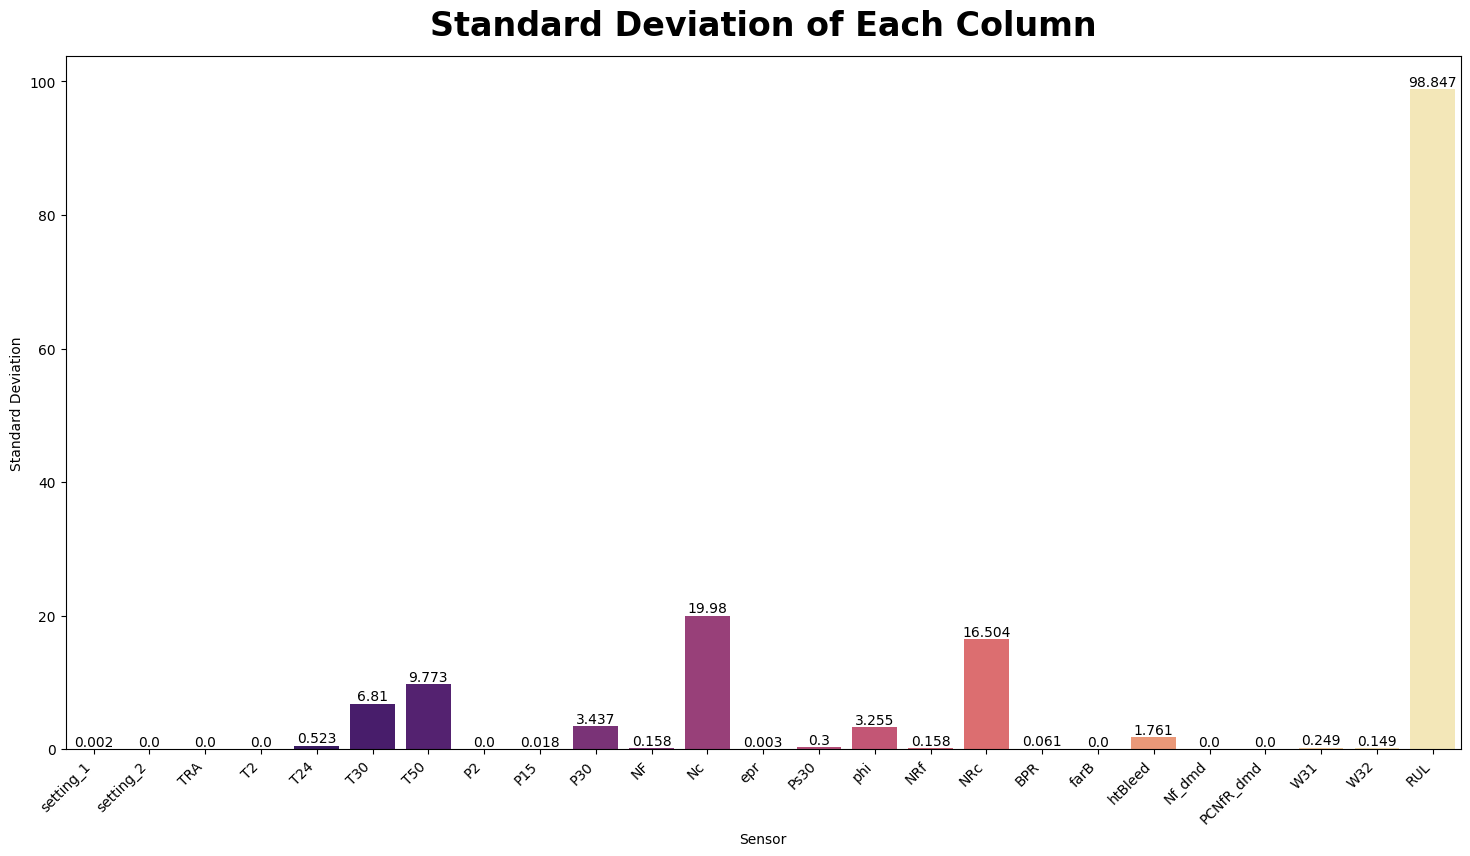

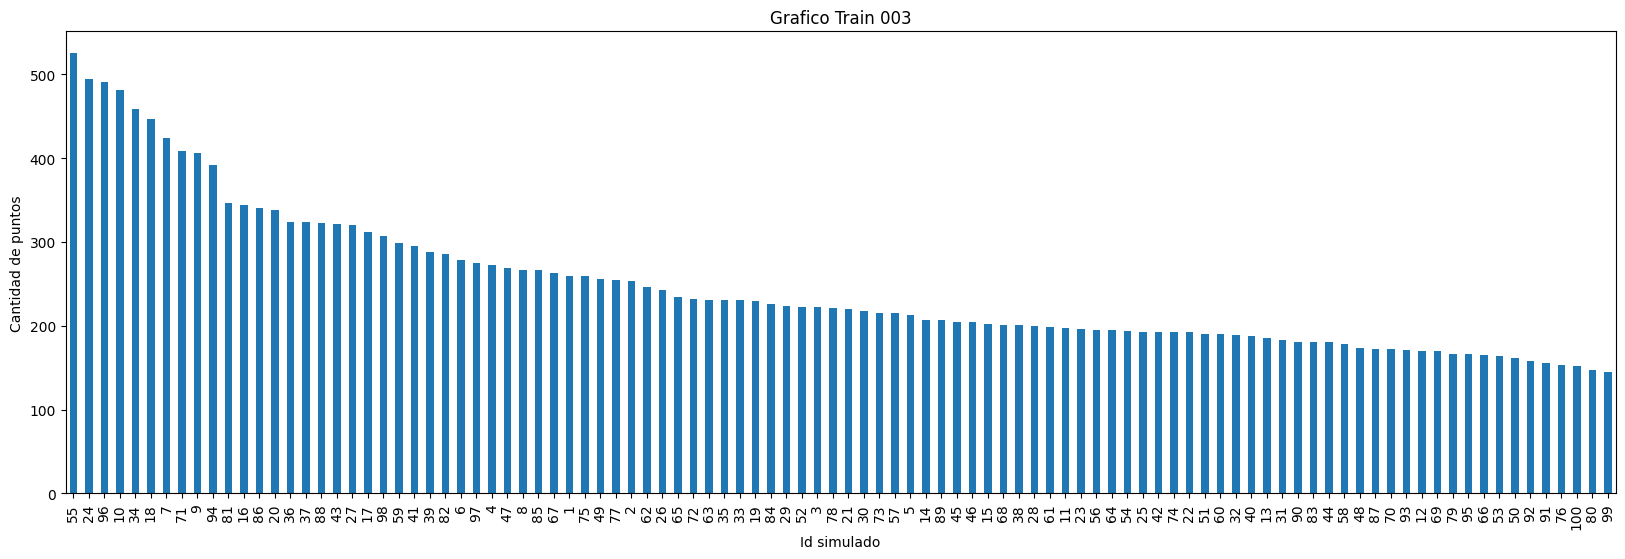

In [1]:
import numpy as np 
import pandas as pd
import sklearn #matematicas
import seaborn as sns #grafiacar
import matplotlib.pyplot as plt

fd_001 = pd.read_csv('train_FD003.txt',sep=" ",header= None)

fd_001.drop(columns=[26,27],inplace=True)
columns = ['unit_number', 'time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','NF','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']
fd_001.columns = columns 

def prepare_train_data(data, factor = 0):
# Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
    df = data.copy()

# Agrupar por 'unit_number' y encontrar el máximo 'time_in_cycles' para cada grupo
# reset_index() se usa para convertir 'unit_number' de un índice a una columna
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()

# Cambiar el nombre de la columna 'time_in_cycles' a 'max'
    fd_RUL.rename(columns = {'time_in_cycles':'max'}, inplace = True)

# Combinar el DataFrame original con fd_RUL basado en 'unit_number'
# Esto agrega la columna 'max' al DataFrame original
    df = df.merge(fd_RUL, on=['unit_number'], how='left')

# Calcular la columna 'RUL' como la diferencia entre 'max' y 'time_in_cycles'
    df ['RUL'] = df['max'] - df['time_in_cycles']

# Eliminar la columna 'max' ya que ya no es necesaria
    df.drop(columns=['max'],inplace = True)

# Devolver solo las filas donde 'time_in_cycles' es mayor que el factor dado
    return df[df['time_in_cycles'] > factor]

df = prepare_train_data(fd_001)
#-----------------------------------------------------------------------------------------------------------------------
# Definimos la variable dependiente que queremos analizar. En este caso, 'RUL' (Remaining Useful Life).
dependent_var = ['RUL']

# Creamos un gráfico de dispersión (scatter plot) utilizando PairGrid de seaborn.
# Se filtran los datos para considerar solo las unidades con 'unit_number' menor a 100.
# Los gráficos de dispersión se crearán para cada variable (columnas) en el DataFrame 'df', utilizando 'RUL' como la variable en el eje x.
g = sns.PairGrid(data=df.query('unit_number < 100'), # Filtramos los datos para unidades menores a 100
x_vars=dependent_var, # Variable independiente 'RUL'
y_vars=df.columns, # Columnas del DataFrame a comparar contra 'RUL'
hue="unit_number", # Coloreamos los puntos según el 'unit_number'
height=2, # Altura de cada gráfico
aspect=5) # Relación de aspecto para los gráficos

# Utilizamos la función map para dibujar gráficos de dispersión en la cuadrícula (PairGrid).
g = g.map(plt.scatter)

# Ajustamos los límites del eje x, invirtiendo la dirección del eje para mostrar de 60 a 0.
g = g.set(xlim=(60, 0))

# Agregamos una leyenda para diferenciar las distintas unidades por color.
g = g.add_legend()
# Definimos la variable dependiente que queremos analizar. En este caso, 'RUL' (Remaining Useful Life).
dependent_var = ['RUL']

# Creamos un gráfico de dispersión (scatter plot) utilizando PairGrid de seaborn.
# Se filtran los datos para considerar solo las unidades con 'unit_number' menor a 100.
# Los gráficos de dispersión se crearán para cada variable (columnas) en el DataFrame 'df', utilizando 'RUL' como la variable en el eje x.
g = sns.PairGrid(data=df.query('unit_number < 100'), # Filtramos los datos para unidades menores a 100
x_vars=dependent_var, # Variable independiente 'RUL'
y_vars=df.columns, # Columnas del DataFrame a comparar contra 'RUL'
hue="unit_number", # Coloreamos los puntos según el 'unit_number'
height=2, # Altura de cada gráfico
aspect=5) # Relación de aspecto para los gráficos

# Utilizamos la función map para dibujar gráficos de dispersión en la cuadrícula (PairGrid).
g = g.map(plt.scatter)

# Ajustamos los límites del eje x, invirtiendo la dirección del eje para mostrar de 60 a 0.
g = g.set(xlim=(60, 0))

# Agregamos una leyenda para diferenciar las distintas unidades por color.
g = g.add_legend()

#-----------------------------------------------------------------------------------------------------------------------
### Ver cada sensor por motor ###

# Filtramos los datos para obtener solo aquellos correspondientes al motor con 'unit_number' igual a 39.
engine_id = df[df['unit_number'] == 69]

# Graficamos todas las columnas (sensores) del DataFrame filtrado (excepto las dos primeras columnas) para el motor específico.
# Usamos subplots para crear un gráfico separado por cada sensor, compartiendo el eje x para todos los gráficos.
# Se define un tamaño de figura grande para asegurar que los gráficos sean legibles.
ax1 = engine_id[df.columns[2:]].plot(subplots=True, sharex=True, figsize=(20,30))
#-----------------------------------------------------------------------------------------------------------------------
# Configuramos el tamaño de la figura para que sea lo suficientemente grande para visualizar todos los sensores.
plt.figure(figsize=(18, 9))

# Calculamos las estadísticas descriptivas (media y desviación estándar) de todas las columnas del DataFrame `df`.
# Usamos .loc[['mean', 'std']] para obtener solo las filas de la media y desviación estándar.
# La transponemos (.T) para que las columnas sean los sensores y filtramos desde la tercera columna en adelante [2:] para ignorar las dos primeras columnas que no corresponden a sensores.
subset_stats = df.describe().loc[['mean', 'std']].T[2:]

# Creamos un gráfico de barras para mostrar la desviación estándar de cada columna (sensor).
# Usamos la paleta 'magma' para dar color a las barras.
ax = sns.barplot(x=subset_stats.index, y=subset_stats['std'], palette='magma')

# Ajustamos las etiquetas del eje x (los nombres de los sensores) para que se roten 45 grados y se alineen a la derecha para mayor legibilidad.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

# Agregamos anotaciones a cada barra del gráfico, mostrando el valor de la desviación estándar con 3 decimales.
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), # Texto que muestra la desviación estándar redondeada a 3 decimales
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posición del texto centrado sobre la barra
                ha='center', va='center', fontsize=10, color='black', # Alineación y estilo del texto
                xytext=(0, 5), textcoords='offset points') # Desplazamiento del texto hacia arriba de la barra

# Mostramos el gráfico
plt.show()

#Eliminar columnas con valores constantes que no aportan informacion sobre el estado de la unidad
#Utilizamos el método drop para eliminar columnas especificas de Dataframe 'df'
#Estas columnas se eliminan porque contiene valores constantes qeu no varian y por lo tanto, no aportan informacion util para el analisis o la prediccion del estado de la unidad
df.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'], inplace=True)
#-----------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------
#Veamos cada campaña
#print(df.describe())
plt.figure(figsize=(20,6))
df.unit_number.value_counts().plot.bar()
plt.xlabel('Id simulado')
plt.ylabel('Cantidad de puntos')
plt.title('Grafico Train 003')
plt.show()